In [1]:
import cobra
import pandas as pd

# Exercise Block 3. Biomass growth in a genome-scale metabolic network 

# Exercise 3.1. Identify the molecular components of a cell (protein, DNA, RNA, lipids) whose precursors need the greatest amounts of resources for their synthesis. 

The metabolites in the biomass (objective) function for E. coli are the metabolites that are 
required for the growth of the cell. They comprise amino acids (in proteins), 
deoxynucleotide-triphosphates (DNA), nucleotide-triphosphates (RNA), lipids, and 
various cofactors. Their relative proportions are known from experiments. The four 
metabolic models that are part of this exercise contain different biomass objective 
functions that have been edited such that each is missing one major constituent. Use FBA 
to compute the growth flux for each biomass function in a glucose-minimal environment. 
 
A minimal environment or minimal medium is a medium which contains only one 
source of each essential element (commonly carbon, nitrogen, oxygen, phosphorus and 
sulfur). In a glucose-minimal medium, glucose is the only source of carbon. 
 
Compare your values with the wild type biomass function. Why do you think there is a 
change in the growth flux? In which of the four classes do you observe the greatest 
change in the growth flux values between the alternative and the wild type biomass 
functions? Why? (Hint: Think of the resources required for a major constituent's 
synthesis.)

The files necessary for this exercise are listed below: 

|File name|Description of the biomass function |
|  ---  |  ---  |
|iAF1260.xml|All biomass constituents of the wild type E. coli|
|iAF1260_no_AA.xml|All biomass constituents of the wild type E. coli except amino acids|
|iAF1260_no_Lipids.xml| All biomass constituents of the wild type E. coli except lipids |
|iAF1260_no_RNA.xml|All biomass constituents of the wild type E. coli except RNA |
|iAF1260_no_DNA.xml|All biomass constituents of the wild type E. coli except DNA|

no_AA means that all the reactions that make AAs in the biomass function are removed. They are included in the biomass function because E. coli needs to make AAs to live.

In [2]:
def get_fba(xml):
    model = cobra.io.read_sbml_model(xml)
    fba_solution = model.optimize()
    return fba_solution.objective_value

networks = {"wt":"iAF1260.xml",
            "no_AA":"iAF1260_no_AA.xml",
            "no_lip":"iAF1260_no_Lipids.xml",
            "no_RNA":"iAF1260_no_RNA.xml",
            "no_DNA":"iAF1260_no_DNA.xml"}

fbas = {key:get_fba(val) for key, val in networks.items()}
fbas

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


{'wt': 0.7367009388648831,
 'no_AA': 1.06815548154465,
 'no_lip': 0.877133687868404,
 'no_RNA': 0.82808200153391,
 'no_DNA': 0.7510703537419721}

# Exercise 3.2. Identify essential reactions and the pathways they belong to for the synthesis of the four major biomass constituents (amino acids, lipids, DNA, RNA) of a cell. 

Amino acids (in proteins), deoxynucleotide-triphosphates (in DNA), nucleotide-
triphosphates (in RNA), lipids, and various cofactors are the metabolite precursors that 
are required for the growth of a cell. The four metabolic models that are part of this 
question all contain different biomass objective functions, each of which contains only 
one major constituent at a time (as opposed to the previous exercise, where the functions 
contained all but one constituent). 

The files necessary for this part of the exercise are listed below:    
 
|File name|Description|
|---|---| 
|iAF1260_AA.xml| Only amino acids in the biomass function |
|iAF1260_Lipids.xml| Only lipids in the biomass function |
|iAF1260_RNA.xml| Only RNA in the biomass function |
|iAF1260_DNA.xml| Only DNA in the biomass function |
|iAF1260_subsystems.csv| Reactions and their respective subsystems |
 
Find the essential reactions for each biomass function in a glucose-minimal environment. 
Then, find the metabolic pathways (or subsystem) that each set of these reactions belongs 
to. Do the metabolic pathways designations match with those of the major biomass 
constituents whose biosynthesis they are essential for? Why or why not? (Optional: 
Could you think of a way to plot these results so you can visually compare the usage of 
each pathway between the different models?). 
 
A semicolon-separated .csv file (see the table above) containing all E. coli model 
reactions and their respective subsystems is provided. A few reactions will have 
subsystems with NA values as they are artificial external reactions, however, this will not 
affect your results. You can read the content of a .csv file like a .txt file and iterate over 
its lines using: 
 
file = open("filename.csv") 
for line in file.readlines(): 
    print(line) 
 
This will give you each line as a string, which you can separate into parts using the 
string method .split(). 


## Find the essential reactions for each biomass function in a glucose-minimal environment.

In [3]:
def get_essential(xml):
    model = cobra.io.read_sbml_model(xml)
    deletion_results = cobra.flux_analysis.single_reaction_deletion(model)
    # effect of deleting a single reaction on the maximum possible growth rate after deletion
    deletion_results["growth"] = deletion_results["growth"].round(3)
    essential = deletion_results[deletion_results["growth"] == 0]["ids"]
    return essential.to_list()

networks = {"only_AA" :"iAF1260_AA.xml",
            "only_lip":"iAF1260_Lipids.xml",
            "only_RNA":"iAF1260_RNA.xml",
            "only_DNA":"iAF1260_DNA.xml"}

essentials = {key:get_essential(val) for key, val in networks.items()}

import itertools
for key, val in essentials.items():
    essentials[key] = list(itertools.chain(*essentials[key]))

In [16]:
subsystems = pd.read_csv("iAF1260_subsystems.csv", sep=";")
subsystems.set_index("reaction_id", inplace=True)

df_only_AA = pd.DataFrame({"reaction_id": essentials["only_AA"]})
df_only_AA.set_index("reaction_id", inplace=True)
df_only_AA = df_only_AA.join(subsystems, on="reaction_id")

df_only_lip = pd.DataFrame({"reaction_id": essentials["only_lip"]})
df_only_lip.set_index("reaction_id", inplace=True)
df_only_lip = df_only_lip.join(subsystems, on="reaction_id")

df_only_RNA = pd.DataFrame({"reaction_id": essentials["only_RNA"]})
df_only_RNA.set_index("reaction_id", inplace=True)
df_only_RNA = df_only_RNA.join(subsystems, on="reaction_id")

df_only_DNA = pd.DataFrame({"reaction_id": essentials["only_DNA"]})
df_only_DNA.set_index("reaction_id", inplace=True)
df_only_DNA = df_only_DNA.join(subsystems, on="reaction_id")

df_only_AA


subsystem
reaction_id                                                   
PRAMPC                                    Histidine Metabolism
SULRi                                      Cysteine Metabolism
Biomass                                                    NaN
DAPDC                          Threonine and Lysine Metabolism
ACGS                           Arginine and Proline Metabolism
...                                                        ...
DHAD1               Valine, Leucine, and Isoleucine Metabolism
ADSK                                       Cysteine Metabolism
TYRTA        Tyrosine, Tryptophan, and Phenylalanine Metabo...
G5SADs                         Arginine and Proline Metabolism
BPNT                                       Cysteine Metabolism

[101 rows x 1 columns]

In [5]:
print("only AA:\n", df_only_AA["subsystem"].unique(), "\n")
print("only lip:\n", df_only_lip["subsystem"].unique(), "\n")
print("only RNA:\n", df_only_RNA["subsystem"].unique(), "\n")
print("only DNA:\n", df_only_DNA["subsystem"].unique(), "\n")

only AA:
 ['Histidine Metabolism' 'Cysteine Metabolism' nan
 'Threonine and Lysine Metabolism' 'Arginine and Proline Metabolism'
 'Purine and Pyrimidine Biosynthesis'
 'Inorganic Ion Transport and Metabolism'
 'Tyrosine, Tryptophan, and Phenylalanine Metabolism'
 'Valine, Leucine, and Isoleucine Metabolism' 'Methionine Metabolism'
 'Glutamate metabolism' 'Citric Acid Cycle' 'Folate Metabolism'
 'Unassigned' 'Transport, Outer Membrane Porin'
 'Alanine and Aspartate Metabolism'] 

only lip:
 ['Cell Envelope Biosynthesis' 'Transport, Inner Membrane'
 'Purine and Pyrimidine Biosynthesis' 'Nucleotide Salvage Pathway'
 'Lipopolysaccharide Biosynthesis / Recycling'
 'Threonine and Lysine Metabolism' nan 'Citric Acid Cycle'
 'Membrane Lipid Metabolism' 'Transport, Outer Membrane'
 'Inorganic Ion Transport and Metabolism' 'Glycerophospholipid Metabolism'
 'Unassigned' 'Alanine and Aspartate Metabolism' 'Glutamate metabolism'
 'Alternate Carbon Metabolism' 'Murein Biosynthesis'
 'Transport, Oute

In [26]:
df_heat = None
subsyst_unique = pd.DataFrame({"subsystem":subsystems["subsystem"].unique()})

df = pd.DataFrame(df_only_AA.value_counts())
df.reset_index(inplace=True)
df.rename(columns={0:"only AA"}, inplace=True)
df_heat = subsyst_unique.merge(df, how="left", on="subsystem")

df = pd.DataFrame(df_only_lip.value_counts())
df.reset_index(inplace=True)
df.rename(columns={0:"only lip"}, inplace=True)
df_heat = df_heat.merge(df, how="left", on="subsystem")

df = pd.DataFrame(df_only_RNA.value_counts())
df.reset_index(inplace=True)
df.rename(columns={0:"only RNA"}, inplace=True)
df_heat = df_heat.merge(df, how="left", on="subsystem")

df = pd.DataFrame(df_only_DNA.value_counts())
df.reset_index(inplace=True)
df.rename(columns={0:"only DNA"}, inplace=True)
df_heat = df_heat.merge(df, how="left", on="subsystem")

df_heat.set_index("subsystem", inplace=True)

# import matplotlib
# import numpy as np
# arr = np.array(df_heat.fillna(0))
# arr[:,1:].astype(int)
# matplotlib.pyplot.imshow(arr[:,1:].astype(int))

df_heat.to_csv("heat.csv", index=True)
df_heat

only AA  only lip  \
subsystem                                                               
NaN                                                     NaN       NaN   
Transport, Inner Membrane                               NaN       3.0   
Transport, Outer Membrane Porin                         2.0       1.0   
Transport, Outer Membrane                               NaN       1.0   
Nucleotide Salvage Pathway                              NaN       6.0   
Glycerophospholipid Metabolism                          NaN      10.0   
Alternate Carbon Metabolism                             NaN       2.0   
Cofactor and Prosthetic Group Biosynthesis              NaN       1.0   
Cell Envelope Biosynthesis                              NaN      38.0   
Murein Recycling                                        NaN       NaN   
Nitrogen Metabolism                                     NaN       NaN   
Methylglyoxal Metabolism                                NaN       NaN   
Arginine and Proline Metabolism                        10.0       NaN   
Membrane Lipid Metabolism                               NaN       2.0   
Pyruvate Metabolism                                     NaN       NaN   
Tyrosine, Tryptophan, and Phenylalanine Metabolism     16.0       NaN   
Valine, Leucine, and Isoleucine Metabolism             14.0       NaN   
Lipopolysaccharide Biosynthesis / Recycling             NaN      11.0   
Unassigned                                              1.0       1.0   
Citric Acid Cycle                                       4.0       4.0   
Cysteine Metabolism                                     6.0       NaN   
Purine and Pyrimidine Biosynthesis                     12.0      18.0   
Inorganic Ion Transport and Metabolism                  2.0       1.0   
Methionine Metabolism                                   4.0       NaN   
Alanine and Aspartate Metabolism                        2.0       3.0   
tRNA Charging                                           NaN       NaN   
Threonine and Lysine Metabolism                        12.0       8.0   
Histidine Metabolism                                    9.0       NaN   
Oxidative Phosphorylation                               NaN       NaN   
Glycine and Serine Metabolism                           NaN       NaN   
Pentose Phosphate Pathway                               NaN       NaN   
Glycolysis/Gluconeogenesis                              NaN       NaN   
Folate Metabolism                                       1.0       NaN   
Glutamate metabolism                                    1.0       1.0   
Glutamate Metabolism                                    NaN       NaN   
Glyoxylate Metabolism                                   NaN       NaN   
Anaplerotic Reactions                                   NaN       NaN   
Murein Biosynthesis                                     NaN       2.0   
tRNA charging                                           NaN       NaN   

                                                    only RNA  only DNA  
subsystem                                                               
NaN                                                      NaN       NaN  
Transport, Inner Membrane                                NaN       NaN  
Transport, Outer Membrane Porin                          2.0       1.0  
Transport, Outer Membrane                                NaN       NaN  
Nucleotide Salvage Pathway                               3.0       6.0  
Glycerophospholipid Metabolism                           NaN       NaN  
Alternate Carbon Metabolism                              NaN       NaN  
Cofactor and Prosthetic Group Biosynthesis               NaN       1.0  
Cell Envelope Biosynthesis                               NaN       NaN  
Murein Recycling                                         NaN       NaN  
Nitrogen Metabolism                                      NaN       NaN  
Methylglyoxal Metabolism                                 NaN       NaN  
Arginine and Proline Metabolism     

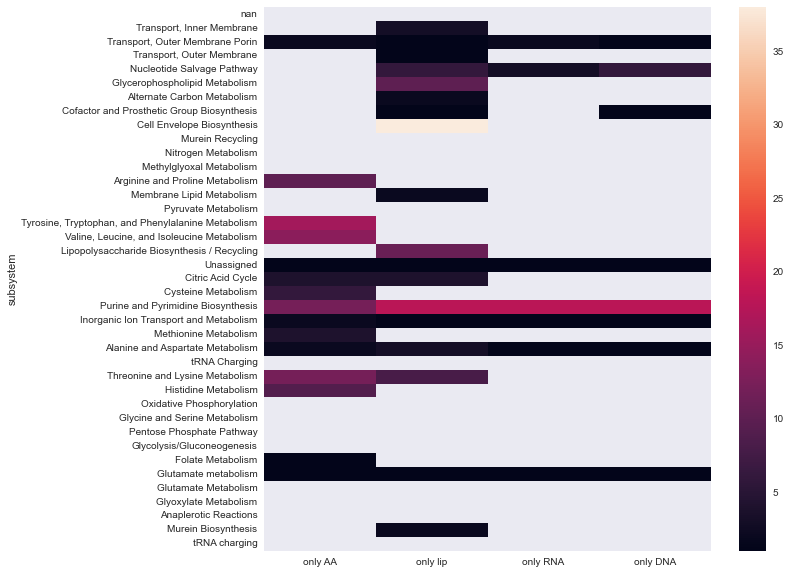

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use("seaborn")

f = plt.figure(figsize=(10,10))
ax = f.add_subplot(1, 1, 1)
sns.heatmap(df_heat, ax=ax)
plt.show()

# Exercise 3.3. How does the number of essential reactions increase, on average, when increasing the number of metabolites included in the biomass reaction?

The biomass reaction of the metabolic network of wild type E. coli contains 67 
metabolites. 293 essential reactions are required for the synthesis of all biomass 
metabolites. 
 
To tackle the main question of the exercise, we have created various biomass reactions 
with randomly chosen biomass metabolites. First, we randomly chose 20 metabolites and 
calculated the number of essential reactions that were needed for biomass production 
with glucose as the carbon source. We repeated this 5 times. Afterwards, we repeated the 
analysis but selecting 30 metabolites for the biomass reaction. We did this one more time 
but selecting 40 metabolites for the biomass reaction. 
 
The file biomass_essential_reactions.tsv is a tab-separated file which contains the results 
of the analysis (Note: The tab character is "\t"). The number of essential reactions is 
given. The different columns correspond to different numbers of metabolites included in 
the biomass reaction (that is, 20, 30, 40 and 67). The first row is a header indicating the 
information of each column. Rows 2 to 6 contain the results of the independent sampling 
of biomass metabolites. You can use the same method described in exercise 3.2. for .csv 
files to access the file content. 
 
Calculate the average number of essential reactions and the standard deviation for each 
using the numpy functions numpy.mean() and numpy.std(), both of which take a list of 
values as an argument. 
Plot the number of essential reactions against the number of molecules to be synthesized 
(20, 30, 40, 67). You can use the matplotlib.pyplot function errorbar(x_values, 
means, yerr=standard_deviations). What is the pattern you observe?

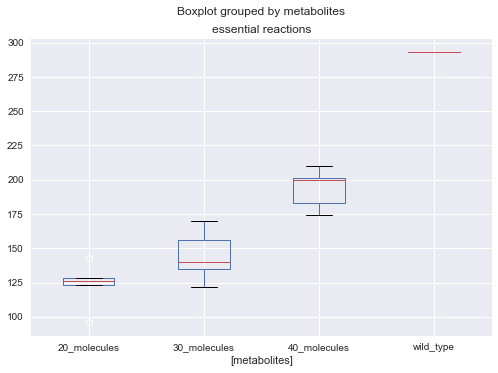

In [58]:
df = pd.read_csv("biomass_essential_reactions.tsv", sep="\t")
df_long = df.melt(var_name="metabolites", value_name="essential reactions")
df_long.boxplot(by="metabolites")

df_res = pd.DataFrame()
df_res["mean"] = df_long.groupby("metabolites").mean()
df_res["std"] = df_long.groupby("metabolites").std()



<AxesSubplot:title={'center':'essential reactions'}, xlabel='[metabolites]'>

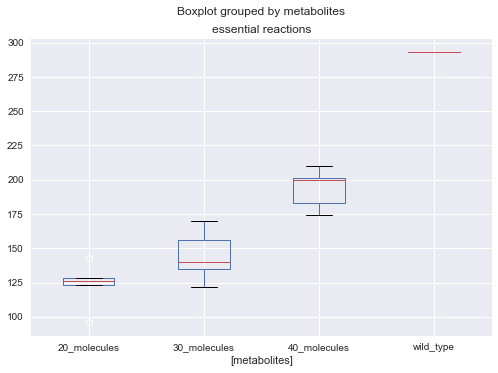

In [63]:
import pandas as pd
(pd
    .read_csv("biomass_essential_reactions.tsv", sep="\t")
    .melt(var_name="metabolites", value_name="essential reactions")
    .boxplot(by="metabolites")
)